### **How does the Earth Mover Distance work?**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance 

In [3]:
# Given distributions
dirt = np.array([0.2, 0.1, 0.0, 0.0, 0.3, 0.0, 0.4])
holes = np.array([0.0, 0.5, 0.3, 0.0, 0.2, 0.0, 0.0])

# Calculate Wasserstein distance without providing bins
wp_no_bins = wasserstein_distance(dirt, holes)

# Explicitly define bins
bins = np.array([0, 1, 2, 3, 4, 5, 6])

# Calculate Wasserstein distance with explicitly provided bins
wp_with_bins = wasserstein_distance(bins, bins, dirt, holes)

# Check if the distance is simmetric
wp_simmetric = wasserstein_distance(bins, bins, holes, dirt)

# Check the order
wp_order = wasserstein_distance(holes, dirt, bins, bins)

# Print the results
print(f"Wasserstein Distance without bins: {wp_no_bins}")
print(f"Wasserstein Distance with bins: {wp_with_bins}")
print(f"Wasserstein Distance is simmetric: {wp_simmetric}")

Wasserstein Distance without bins: 0.028571428571428574
Wasserstein Distance with bins: 2.1999999999999997
Wasserstein Distance is simmetric: 2.1999999999999997
0.09523809523809523


Visualize the steps to calculate EMD.

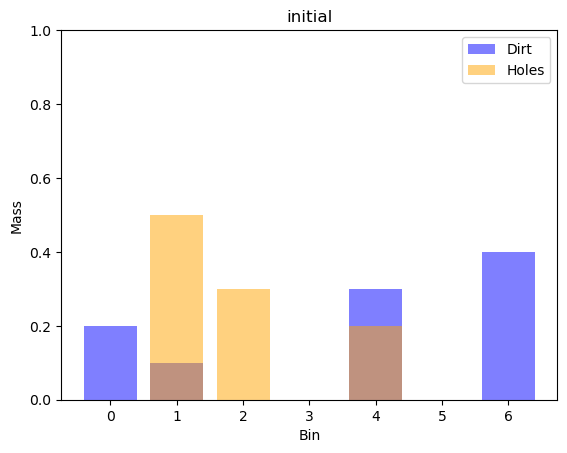

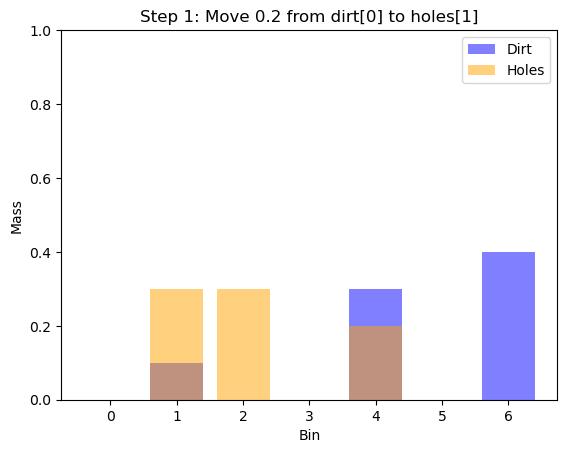

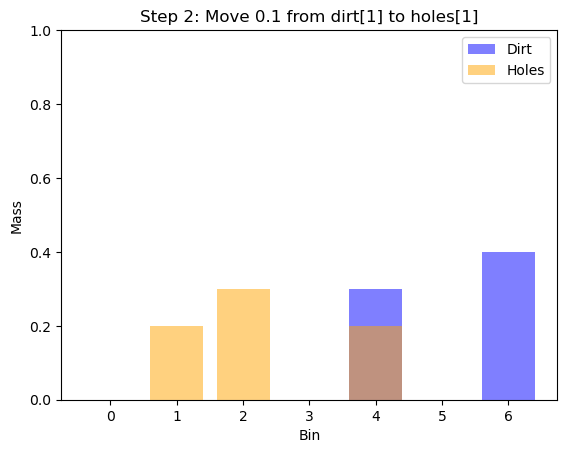

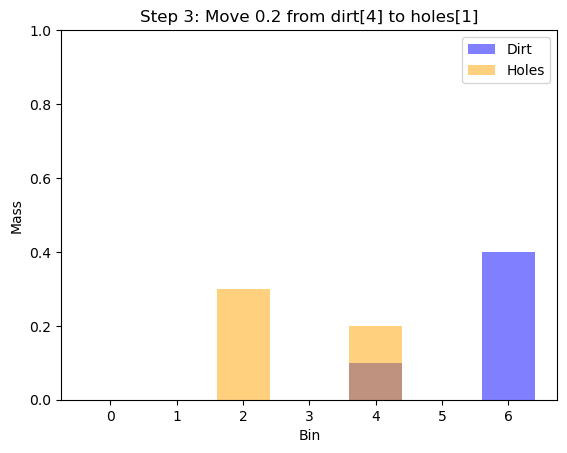

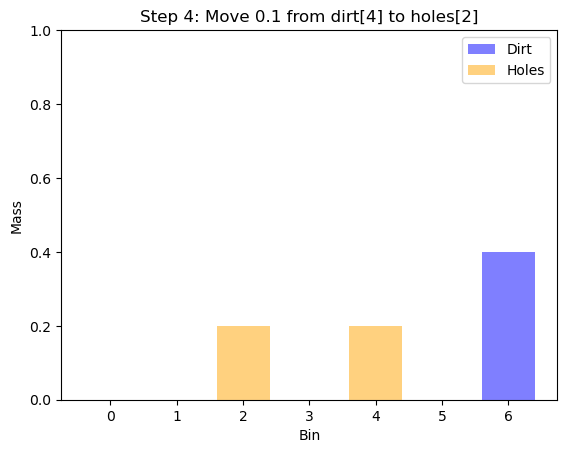

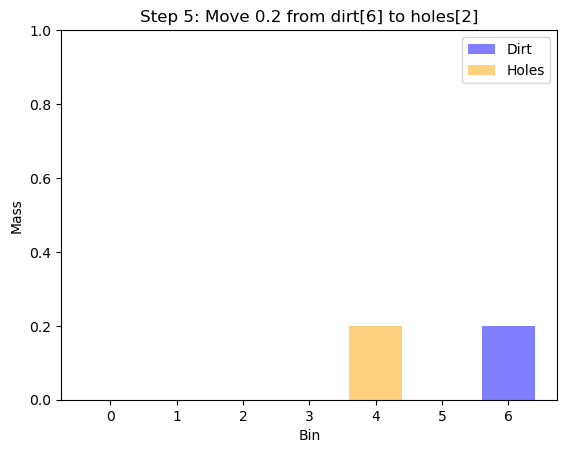

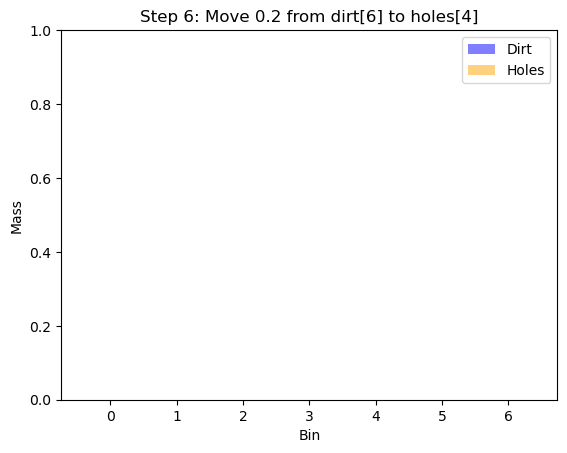

In [3]:
# Function to visualize distributions
def visualize_distributions(dirt, holes, title):
    plt.bar(range(len(dirt)), dirt, alpha=0.5, label='Dirt', color='blue')
    plt.bar(range(len(holes)), holes, alpha=0.5, label='Holes', color='orange')
    plt.legend()
    plt.ylim([0,1])
    plt.title(title)
    plt.xlabel('Bin')
    plt.ylabel('Mass')
    plt.show()

visualize_distributions(dirt,holes,'initial')

# Step 1: Move 0.2 from dirt[0] to holes[1]
holes[1] -= dirt[0]
dirt[0] = 0.0
visualize_distributions(dirt, holes, 'Step 1: Move 0.2 from dirt[0] to holes[1]')

# Step 2: Move 0.1 from dirt[1] to holes[1]
holes[1] -= dirt[1]
dirt[1] = 0.0
visualize_distributions(dirt, holes, 'Step 2: Move 0.1 from dirt[1] to holes[1]')

# Step 3: Move 0.2 from dirt[4] to holes[1]
holes[1] -= dirt[4]
dirt[4] = 0.1
visualize_distributions(dirt, holes, 'Step 3: Move 0.2 from dirt[4] to holes[1]')

# Step 4: Move 0.1 from dirt[4] to holes[2]
holes[2] -= dirt[4]
dirt[4] = 0.0
visualize_distributions(dirt, holes, 'Step 4: Move 0.1 from dirt[4] to holes[2]')

# Step 5: Move 0.2 from dirt[6] to holes[2]
holes[2] -= dirt[6]
dirt[6] = 0.2
visualize_distributions(dirt, holes, 'Step 5: Move 0.2 from dirt[6] to holes[2]')

# Step 6: Move 0.2 from dirt[6] to holes[4]
holes[4] -= dirt[6]
dirt[6] = 0.0
visualize_distributions(dirt, holes, 'Step 6: Move 0.2 from dirt[6] to holes[4]')

In [ ]:
# wasserstein_scratch.py
# Wasserstein distance from scratch
# Not really true Wasserstein -- special version for
# p = 1, discrete probability distribution data.

def first_nonzero(dirt_or_holes):
  # index of first cell greater than 0.00
  dim = len(dirt_or_holes)
  for i in range(dim):
    if dirt_or_holes[i] != 0.0:  # replace "gt"
      return i
  return -1  # no cells found

def move_dirt(dirt, from_idx, holes, to_idx):
  # move as much dirt at [from] as possible to holes[to]
  if dirt[from_idx] < holes[to_idx]:  # use all dirt
    flow = dirt[from_idx]
    # print("moving all " + str(flow) + " from " + \
    # str(from_idx) + " to " + str(to_idx))
    dirt[from_idx] = 0.0  # all dirt got moved
    holes[to_idx] -= flow  # less to fill now
  elif dirt[from_idx] >  holes[to_idx]:  # use just part of dirt
    flow = holes[to_idx]  # fill remainder of hole
    # print("moving just " + str(flow) + " from " + \
    # str(from_idx) + " to " + str(to_idx))
    dirt[from_idx] -= flow
    holes[to_idx] = 0.0  # hole is filled
  dist = np.abs(from_idx - to_idx)
  return flow, dist, dirt, holes

def my_wasserstein(dirt, holes):
  # dirt and holes are frequency dists sum 1.0
  # loop until holes filled
  #  find available first dirt
  #  find first available hole
  #  move as much dirt as possible
  # end-loop

  dirt_c = np.copy(dirt) 
  holes_c = np.copy(holes)
  tot_work = 0.0

  while True:  # todo: add sanity counter check
    from_idx = first_nonzero(dirt_c)
    to_idx = first_nonzero(holes_c)
    if from_idx == -1 or to_idx == -1:
      break
    (flow, dist, dirt_c, holes_c) = \
      move_dirt(dirt_c, from_idx, holes_c, to_idx)
    tot_work += flow * dist
    # print(dirt_c); print(holes_c); input()
  return tot_work  # 

def main():
  print("\nBegin Wasserstein from scratch demo ")
  np.set_printoptions(formatter={'float': '{: 0.2f}'.format})
  np.random.seed(1)

  dirt  = np.array([0.2, 0.1, 0.0, 0.0, 0.3, 0.0, 0.4])
  holes = np.array([0.0, 0.5, 0.3, 0.0, 0.2, 0.0, 0.0])
  dirt = np.array([0, 1, 3])
  holes = np.array([5, 6, 8])

  print("\nDirt distribution: ")
  print(dirt)
  print("\nHoles distribution: ")
  print(holes)

  wd = my_wasserstein(dirt, holes)
  print("\nWasserstein distance from scratch = %0.4f " % wd)

  bins = [0,1,2,3,4,5,6]
  #wd = wasserstein_distance(bins, bins, dirt, holes)  # scipy version
  wd = wasserstein_distance(dirt, holes)  # scipy version
  print("Wasserstein distance from scipy   = %0.4f " % wd)

  # validate scratch version against scipy
  # bins = [0,1,2,3,4,5,6,7,8,9]
  # for i in range(100_000):
  #   dirt = np.random.uniform(low=0.0, high=1.0, size=10)
  #   dirt = dirt / np.sum(dirt)
  #   holes = np.random.uniform(low=0.0, high=1.0, size=10)
  #   holes = holes / np.sum(holes)
  #   wd_scratch = my_wasserstein(dirt, holes)
  #   wd_scipy = wasserstein_distance(bins, bins, dirt, holes)
  #   if np.abs(wd_scratch - wd_scipy) "gt" 0.0001:
  #     print("Something wrong - different results! ")
  #     print("Wasserstein from scratch = %0.4f " % wd_scratch)
  #     print("Wasserstein from scipy   = %0.4f " % wd_scipy)
  #     input()

  print("\nEnd demo ")

if __name__ == "__main__":
  main()